In [2]:
#Import Relevant Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

After working at a restaurant for a few months, I decided to use python to forecast my potential year's income from this job.  Given the small sample size of my earnings spreadsheet, I decided to draw bootstrap replicates using the mean values for my tips, tipouts, and paychecks to simulate a larger sample sizes and attempt to gain more accurate yearly income forecasts.  Tips are paid every shift, tipouts are a small percentage of servers' tips paid to hosts weekly, and paychecks are paid bi-weekly based on hours worked.  

Below, I removed NA values from two of my dataframes and converted them to individual numpy arrays for ease of use and analysis.  My tipout and paycheck dataframes had many NA values because all of my data came from one spreadsheet with varying column lengths.  

In [3]:
#Initialize dataframes and remove NA values as needed for later analysis (Tip index much longer than others)
df = pd.read_csv("C:/Users/patte/OneDrive - Washington and Lee University/Tip Data.csv")
df_tipouts = df['Tipouts']
df_tipouts_corrected = df_tipouts.dropna(how='any')

df_paychecks = df['Paychecks']
df_paychecks_corrected = df_paychecks.dropna(how='any')

Text(0.5, 0, 'Tips (Dollars)')

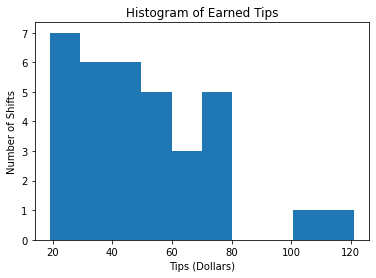

In [4]:
#initialize arrays from dataframes
tips = np.array(df['Tips'])
tipouts = np.array(df_tipouts_corrected)
paychecks = np.array(df_paychecks_corrected)

plt.hist(tips)
plt.title('Histogram of Earned Tips')
plt.ylabel('Number of Shifts')
plt.xlabel('Tips (Dollars)')

As you can see from the above histogram, my tips are highly variable and do not form a normal distribution.  This is probably due to outliers and the small sample size.  

Below I defined my bootstrapping function to randomly sample from my datasets and replace values with the product of a function.  This allows me to draw bootstrap replicates to obtain a larger dataset and account for the high variability shown in the above histogram.  Bootstrapping also allows me to "create" larger datasets for paychecks and tipouts because I started with a very small sample size for these and their values have been highly variable since I started my job at the restaurant.  

In [5]:
#define bootstrapping function; random resampling with replacement
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    #initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    #generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

Text(0.5, 1.0, 'Tip Distribution for 10,000 Bootstrap Replicates of Mean Tips')

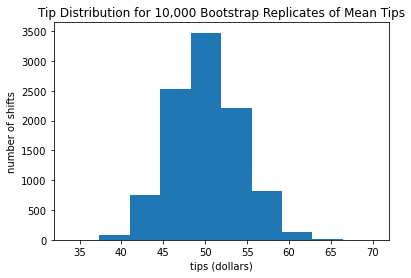

In [6]:
#10000 Bootstrap replicates
tips_bs_replicates = draw_bs_reps(tips, np.mean, size=10000)
plt.hist(tips_bs_replicates)
plt.ylabel('number of shifts')
plt.xlabel('tips (dollars)')
plt.title('Tip Distribution for 10,000 Bootstrap Replicates of Mean Tips')

The above histogram shows the data generated by my bootstrapping function.  Bootstrapping provided me with a larger, more normalized dataset to (hopefully) forecast my potential income more accurately.  

In [8]:
#potential years tips (Work about 29 shifts per month)
monthly_shifts = 29

#Take percentiles from bs replicates to estimate "good" "bad" and "average" tips
good_tips = np.percentile(tips_bs_replicates, 75)
bad_tips = np.percentile(tips_bs_replicates, 25)
average_tips = np.mean(np.random.choice(tips_bs_replicates, size=29))

def year(data, size):
    return data * size

#compute yearly shifts based on last month's shifts
year_shifts = monthly_shifts * 12

#compute potential yearly tips
good_year_tips = year(good_tips, year_shifts)
year_tips = year(average_tips, size = year_shifts)
bad_year_tips = year(bad_tips, size=year_shifts)
print('One year of "good" tips: ',good_year_tips)
print('One year of "average" tips: ', year_tips)
print('One year of "bad" tips: ', bad_year_tips)

One year of "good" tips:  18354.569117647057
One year of "average" tips:  17453.477647058822
One year of "bad" tips:  16470.48176470588


I decided to boootstrap my paychecks and tipouts because of my small sample size and the high variability of these values between pay cycles.  Tipouts and paychecks both depend on hours worked, and my number of working hours has been highly variable between pay cycles.  

In [9]:
#bootstrapping paychecks to "create" larger dataset, compute percentiles to forecast potential income ranges
paychecks_bs_replicates = draw_bs_reps(paychecks, np.mean, size=10000)
good_paychecks = np.percentile(paychecks_bs_replicates, 75)
bad_paychecks = np.percentile(paychecks_bs_replicates, 25)

#bootstrapping tipouts to "create" larger dataset, compute percentiles to forecast potential income ranges
tipouts_bs_replicates = draw_bs_reps(tipouts, np.mean, size=10000)
good_tipouts = np.percentile(tipouts_bs_replicates, 75)
bad_tipouts = np.percentile(tipouts_bs_replicates, 25)

In [16]:
#let's look at year's paychecks
#pay is bi-weekly, 26 paychecks per year
good_year_paychecks = year(good_paychecks, 26)
year_paychecks = sum(np.random.choice(paychecks_bs_replicates, size=26))
bad_year_paychecks = year(bad_paychecks, 26)

#year's tipouts, tipouts are weekly, 52 tipouts per year
good_year_tipouts = year(good_tipouts, 52)
year_tipouts = sum(np.random.choice(tipouts_bs_replicates, size=52))
bad_year_tipouts = year(bad_tipouts, 52)
#define function for income
def income(x,y,z):
    return round((x + y + z), ndigits=2)

"Good" and "bad" values were computed using 75th and 25th percentiles respectively.  This is not very realistic, but I did this as a side project and wanted to forecast potential incomes for different conditions.  The middle value ("year income") was computed using random choice from my bootstrap replicates.  Number of random smamples for tips, tipouts, and paychecks were computed using appropriate sizes (approximate shifts per year given shifts worked so far, 26 paychecks per year, and 52 tipouts per year).  

In [17]:
good_income = income(good_year_paychecks, good_year_tips, good_year_tipouts)
year_income = income(year_paychecks, year_tips, year_tipouts)
bad_income = income(bad_year_paychecks, bad_year_tips, bad_year_tipouts)

print('good year income = $' + str(good_income))
print('year income = $' + str(year_income))
print('bad year income = $' + str(bad_income))

good year income = $27974.96
year income = $26198.83
bad year income = $24001.71


Last but not least, I was curious about how tips would change as a percentage of total income for the "good", "bad", and "average" conditions.  Interestingly, tips should comprise a higher percentage of total income if total income is lower.  

In [12]:
def tip_percentage(x,y):
    return((x/y) * 100)

good_tip_percentage = tip_percentage(good_year_tips, good_income)
year_tip_percentage = tip_percentage(year_tips, year_income)
bad_tip_percentage = tip_percentage(bad_year_tips, bad_income)

print(good_tip_percentage)
print(year_tip_percentage)
print(bad_tip_percentage)

65.61070728125101
66.84474713422938
68.62211802703175


I hope this report provides some insight into my programming and analytical skills, thanks for reading!